- ### Master big data et AI
- ### Réalisé par : Chaima atanane & hajae El aazouzzi 

### 1-Importer les bibliothèques nécessaires:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### 2- Lire les données:

In [2]:
# Remplacez 'chemin/vers/votre/fichier.csv' par le chemin réel de votre fichier
data = pd.read_csv('HR Data.xlsx - HR data.csv')


### 3- Explorer les données:

In [3]:
print(data.head())
print(data.info())
print(data.describe())


  Attrition    Business Travel CF_age band CF_attrition label Department  \
0       Yes      Travel_Rarely     35 - 44       Ex-Employees      Sales   
1        No  Travel_Frequently     45 - 54  Current Employees        R&D   
2       Yes      Travel_Rarely     35 - 44       Ex-Employees        R&D   
3        No  Travel_Frequently     25 - 34  Current Employees        R&D   
4        No      Travel_Rarely     25 - 34  Current Employees        R&D   

  Education Field   emp no  Employee Number  Gender               Job Role  \
0   Life Sciences  STAFF-1                1  Female        Sales Executive   
1   Life Sciences  STAFF-2                2    Male     Research Scientist   
2           Other  STAFF-4                4    Male  Laboratory Technician   
3   Life Sciences  STAFF-5                5  Female     Research Scientist   
4         Medical  STAFF-7                7    Male  Laboratory Technician   

   ... Performance Rating Relationship Satisfaction Standard Hours  \
0  .

### 4- Effectuer le traitement des données

In [4]:
# Exemple de sélection de colonnes
selected_columns = data[['Attrition', 'Business Travel', 'Age', 'Gender', 'Monthly Income']]


### 5- Visualiser les données

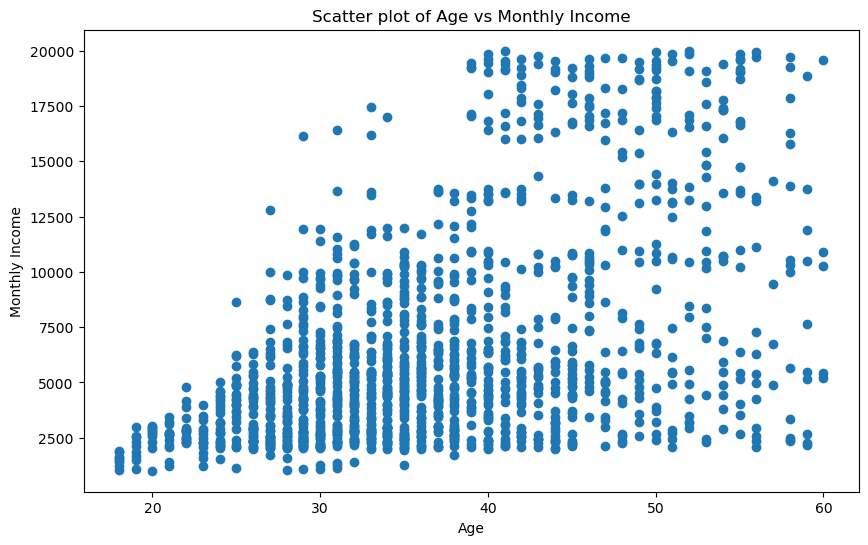

In [5]:
# Exemple de visualisation
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Monthly Income'])
plt.title('Scatter plot of Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()


### 6- Histogramme de l'âge

- L'histogramme donne une idée de la distribution de l'âge des employés.

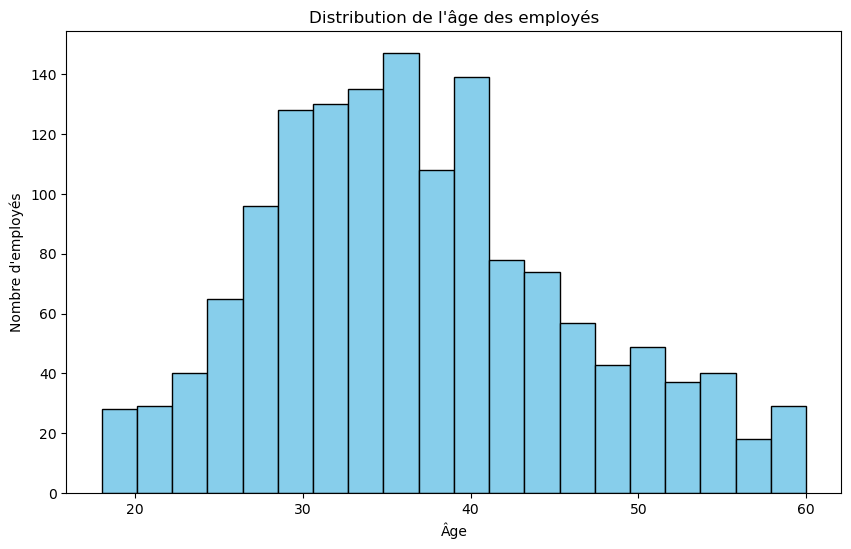

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution de l\'âge des employés')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'employés')
plt.show()


### 7- Diagramme à barres pour Attrition

- Un diagramme à barres montrant le nombre d'employés ayant quitté l'entreprise par rapport à ceux qui sont restés.

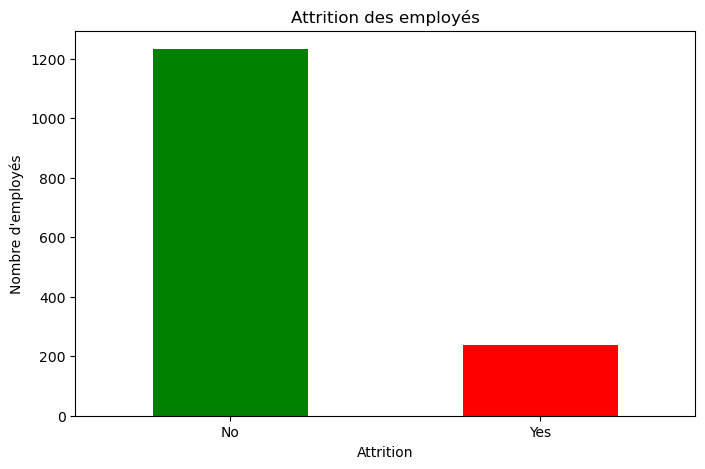

In [7]:
plt.figure(figsize=(8, 5))
data['Attrition'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Attrition des employés')
plt.xlabel('Attrition')
plt.ylabel('Nombre d\'employés')
plt.xticks(rotation=0)
plt.show()


### 8- Boîte à moustaches pour le salaire mensuel

- La boîte à moustaches aide à identifier la distribution et les valeurs aberrantes du salaire mensuel.

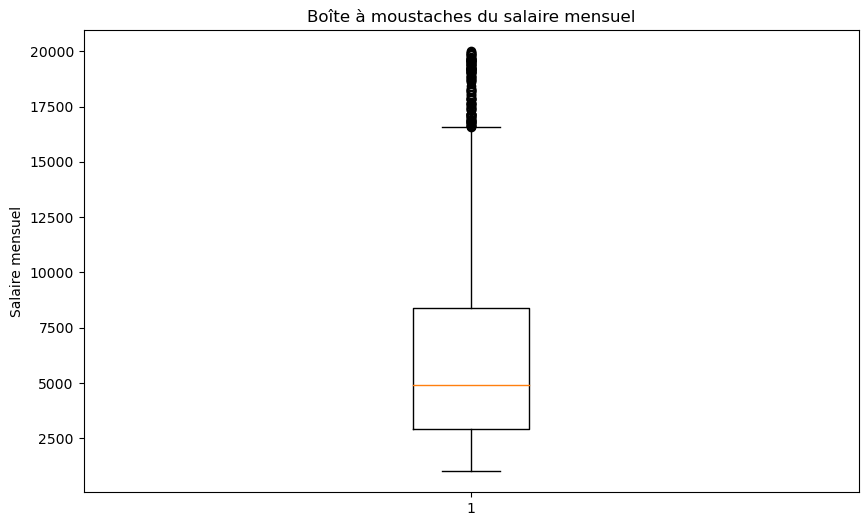

In [8]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Monthly Income'])
plt.title('Boîte à moustaches du salaire mensuel')
plt.ylabel('Salaire mensuel')
plt.show()


### 9- Diagramme à barres pour le département

- Un diagramme à barres montrant la répartition des employés par département.

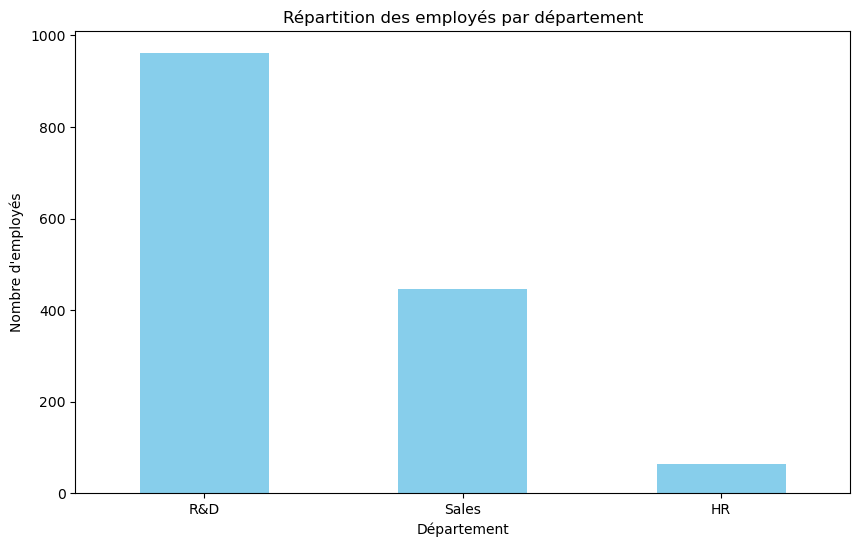

In [9]:
plt.figure(figsize=(10, 6))
data['Department'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Répartition des employés par département')
plt.xlabel('Département')
plt.ylabel('Nombre d\'employés')
plt.xticks(rotation=0)
plt.show()


### 10- Diagramme de dispersion avec couleur pour Attrition

- Un diagramme de dispersion avec une couleur différente pour les employés ayant quitté l'entreprise.

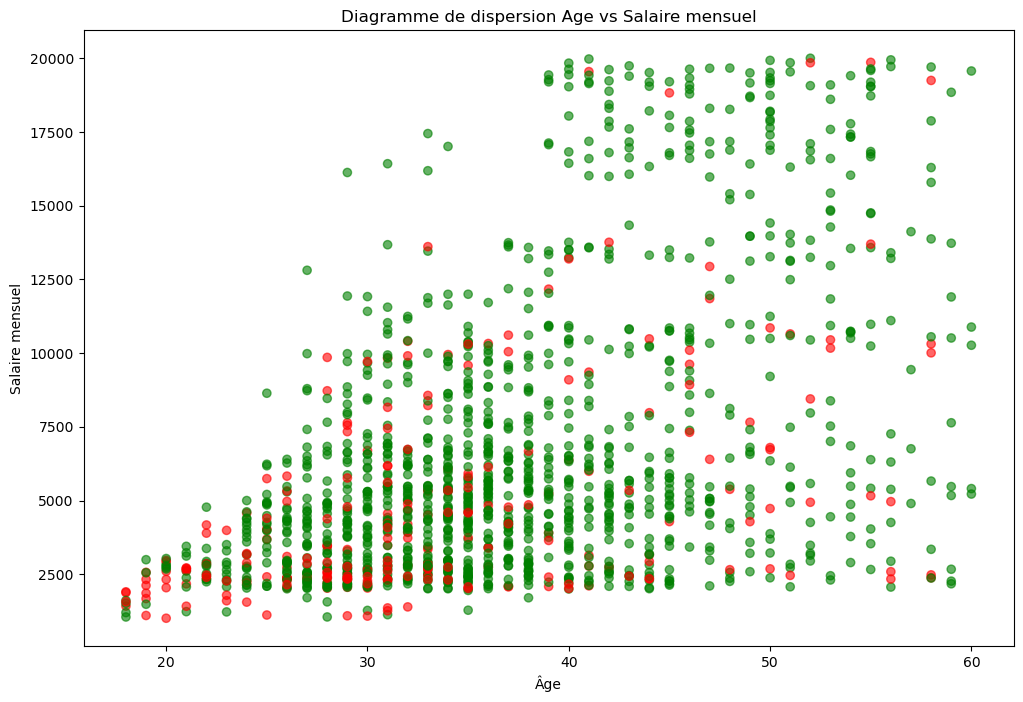

In [10]:
plt.figure(figsize=(12, 8))
plt.scatter(data['Age'], data['Monthly Income'], c=data['Attrition'].map({'Yes': 'red', 'No': 'green'}), alpha=0.6)
plt.title('Diagramme de dispersion Age vs Salaire mensuel')
plt.xlabel('Âge')
plt.ylabel('Salaire mensuel')
plt.show()


### 11- Analyse approfondie de la démographie des employés et de ses implications sur l'attrition : Un regard détaillé sur l'âge, le département, le salaire et les tendances de départ des employés.

### Distribution de l'âge des employés (Histogramme) :

- La plupart des employés ont entre 25 et 45 ans.
- Il y a une concentration significative d'employés dans la tranche d'âge de 30 à 40 ans.
**************************************************************************

### Attrition des employés (Diagramme à barres) :

- La plupart des employés ne quittent pas l'entreprise (Attrition = No).
- Le nombre d'employés ayant quitté (Attrition = Yes) est relativement faible.
**************************************************************************

### Salaire mensuel (Boîte à moustaches) :

- La médiane du salaire mensuel se situe autour de 5000.
- Il y a quelques valeurs aberrantes avec des salaires mensuels très élevés.
***********************************************************************

### Répartition par département (Diagramme à barres) :

- La plupart des employés se trouvent dans le département de R&D, suivi du département des ventes.
- Les effectifs du département des ressources humaines semblent être les plus bas.
*************************************************************************

### Diagramme de dispersion Age vs Salaire mensuel avec couleur pour Attrition :

- Les employés ayant quitté (Attrition = Yes) semblent être plus jeunes, en général.

- Il n'y a pas de motif clair entre l'âge et le salaire mensuel.

*************************************************************************
- Cette analyse approfondie permet d'identifier des tendances et des relations potentielles dans les données. Cependant, il est important de noter que ces observations sont basées sur des visualisations exploratoires et que des analyses statistiques plus avancées pourraient être nécessaires pour tirer des conclusions plus solides. Par exemple, des tests statistiques peuvent être utilisés pour évaluer si certaines caractéristiques ont un impact significatif sur l'attrition des employés.

### 12- Modélisation de l'Attrition des Employés : Utilisation de la Régression Logistique pour Prédire les Départs en Fonction des Caractéristiques Démographiques et Professionnelles.

### Importation des bibliothèques nécessaires

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


- Ces lignes importent les bibliothèques nécessaires pour manipuler les données, diviser l'ensemble de données en ensembles d'entraînement et de test, effectuer l'encodage des étiquettes, créer un modèle de régression logistique, et évaluer les performances du modèle.

### Chargement des données

In [15]:
data = pd.read_csv('HR Data.xlsx - HR data.csv')


- Cette ligne charge les données à partir d'un fichier CSV dans un objet DataFrame de pandas.

### Prétraitement des données 

In [16]:
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])


- L'encodeur d'étiquettes est utilisé pour convertir les valeurs de la colonne 'Attrition' en nombres (0 pour 'No' et 1 pour 'Yes').

### Sélection des caractéristiques

In [17]:
features = ['Age', 'Daily Rate', 'Distance From Home', 'Monthly Income', 'Num Companies Worked', 
            'Percent Salary Hike', 'Total Working Years', 'Years At Company', 'Years In Current Role']
X = data[features]
y = data['Attrition']


- Les caractéristiques sélectionnées (variables indépendantes) et la variable cible ('Attrition') sont définies.

### Division des données

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Les données sont divisées en ensembles d'entraînement et de test.

### Création du modèle de régression logistique

In [19]:
model = LogisticRegression()


- Un modèle de régression logistique est instancié.

### Entraînement du modèle

In [20]:
model.fit(X_train, y_train)


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- Le modèle est entraîné sur l'ensemble d'entraînement.

### Prédictions sur l'ensemble de test

In [21]:
predictions = model.predict(X_test)


- Le modèle est utilisé pour faire des prédictions sur l'ensemble de test.

### Évaluation du modèle

In [22]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)


- L'exactitude, la matrice de confusion et le rapport de classification du modèle sont calculés et affichés.

### Affichage des résultats

In [23]:
print(f"Précision du modèle : {accuracy:.2%}\n")
print("Matrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", classification_report_str)


Précision du modèle : 85.37%

Matrice de confusion :
 [[251   2]
 [ 41   0]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       253
           1       0.00      0.00      0.00        41

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.74      0.85      0.79       294



- Les résultats sont affichés, montrant l'exactitude du modèle, la matrice de confusion et le rapport de classification.

#### Précision du modèle : 85.37%

- La précision représente la proportion d'instances correctement prédites parmi toutes les prédictions du modèle. Dans ce cas, le modèle a une précision de 85.37%, ce qui signifie qu'il a correctement prédit l'attrition des employés dans 85.37% des cas.

#### Matrice de confusion 

- La matrice de confusion montre la répartition des prédictions du modèle.
*****************************
- Vrais positifs (VP) : 0
- Faux positifs (FP) : 2
- Vrais négatifs (VN) : 251
- Faux négatifs (FN) : 41
****************************
- Cela signifie que le modèle a correctement prédit 251 employés qui ne quitteront pas l'entreprise (Vrais négatifs), mais il a fait des erreurs en prédisant 2 employés qui quitteront l'entreprise alors qu'ils ne le feront pas (Faux positifs) et en ne prédisant aucun employé qui quittera réellement l'entreprise (Vrais positifs), mais 41 employés qui quitteront réellement l'entreprise n'ont pas été prédits (Faux négatifs).

#### Rapport de classification 

- Le rapport de classification fournit des métriques de performance pour chaque classe (0 et 1) ainsi que des moyennes globales.
**********
- Pour la classe 0 (employés ne quittant pas l'entreprise), la précision est élevée (86%), mais le recall (rappel) est encore plus élevé (99%). Cela signifie que le modèle a une forte capacité à identifier les employés qui resteront dans l'entreprise, mais il manque ceux qui quitteront réellement.
**********
- Pour la classe 1 (employés quittant l'entreprise), la précision est de 0%, indiquant que le modèle n'a correctement prédit aucun employé quittant l'entreprise. Le recall est également de 0%, montrant que le modèle n'a pas réussi à capturer les employés qui ont réellement quitté.